In [20]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Sample transactional data
transaction_data = {
    'Date': pd.date_range('2022-01-01', '2022-01-10'),
    'Category': ['Grocery', 'Electronics', 'Clothing', 'Grocery', 'Electronics', 'Clothing', 'Grocery', 'Electronics', 'Clothing', 'Grocery'],
    'Amount': [50, 120, 30, 40, 100, 25, 35, 80, 20, 45],
    'Transaction_Type': ['Purchase', 'Purchase', 'Refund', 'Purchase', 'Purchase', 'Refund', 'Purchase', 'Purchase', 'Refund', 'Purchase']
}

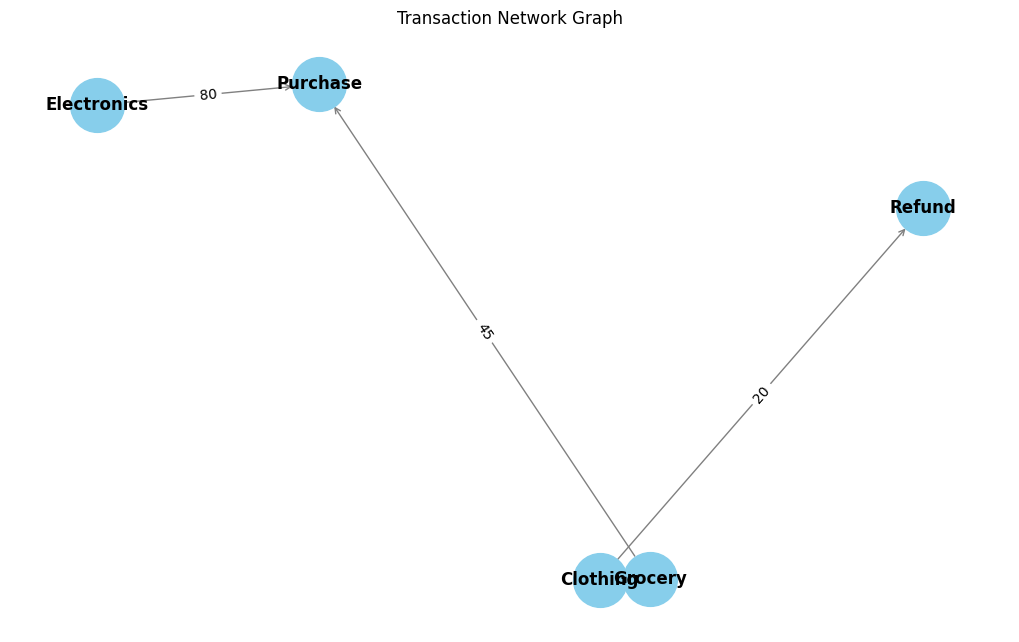

In [21]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes (categories) to the graph
G.add_nodes_from(transaction_data['Category'])

# Add edges (transactions) to the graph
for i in range(len(transaction_data['Category'])):
    sender = transaction_data['Category'][i]
    recipient = 'Refund' if transaction_data['Transaction_Type'][i] == 'Refund' else 'Purchase'
    amount = transaction_data['Amount'][i]
    G.add_edge(sender, recipient, amount=amount)

# Plot the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # Define node positions
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', edge_color='gray', font_size=12, font_weight='bold', arrows=True, arrowstyle='->')
labels = nx.get_edge_attributes(G, 'amount')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Transaction Network Graph')
plt.show()


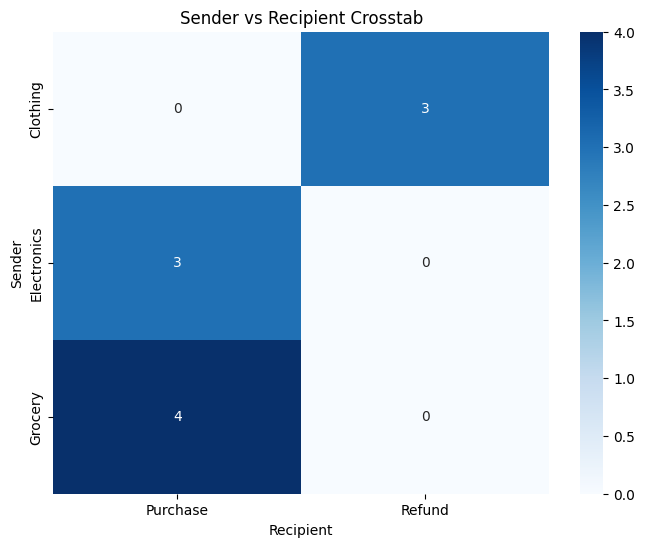

In [23]:
# Create crosstab
crosstab_data = pd.crosstab(transaction_data['Category'], transaction_data['Transaction_Type'])

# Visualize crosstab as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_data, annot=True, cmap='Blues', fmt='d')
plt.title('Sender vs Recipient Crosstab')
plt.xlabel('Recipient')
plt.ylabel('Sender')
plt.show()


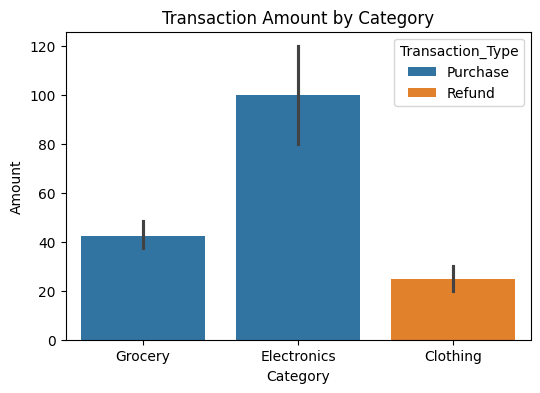

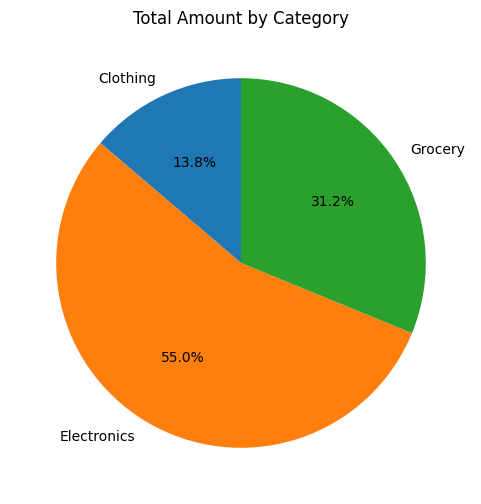

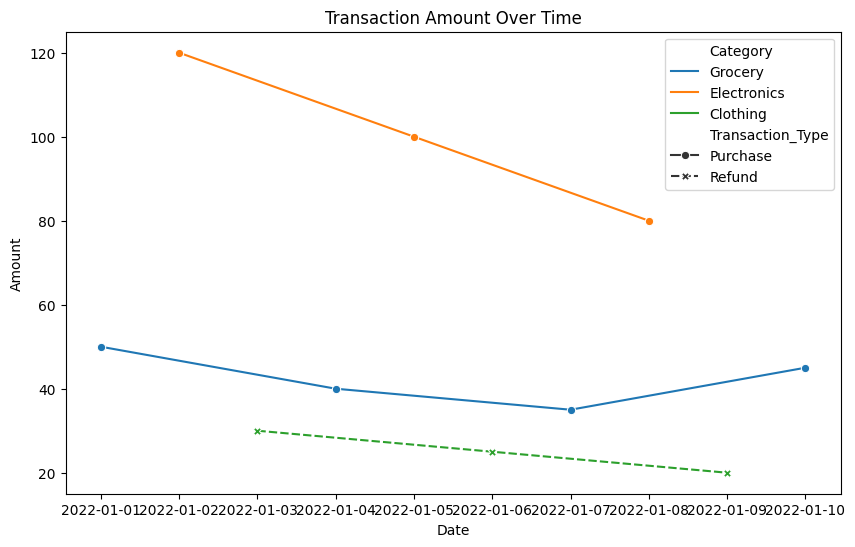

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the dictionary to a DataFrame
transaction_df = pd.DataFrame(transaction_data)

# List Visualization: Bar Chart
plt.figure(figsize=(6, 4))
sns.barplot(x='Category', y='Amount', data=transaction_df, hue='Transaction_Type')
plt.title('Transaction Amount by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.savefig('bar_chart.png')  # Save as PNG
plt.savefig('bar_chart.pdf')  # Save as PDF
plt.savefig('bar_chart.jpg')  # Save as JPG
plt.show()

# List Visualization: Pie Chart
plt.figure(figsize=(6, 6))
transaction_sum_by_category = transaction_df.groupby('Category')['Amount'].sum()
plt.pie(transaction_sum_by_category, labels=transaction_sum_by_category.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Amount by Category')
plt.savefig('pie_chart.png')  # Save as PNG
plt.savefig('pie_chart.pdf')  # Save as PDF
plt.savefig('pie_chart.jpg')  # Save as JPG
plt.show()

# List Visualization: Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Amount', data=transaction_df, hue='Category', style='Transaction_Type', markers=True)
plt.title('Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.savefig('line_plot.png')  # Save as PNG
plt.savefig('line_plot.pdf')  # Save as PDF
plt.savefig('line_plot.jpg')  # Save as JPG
plt.show()


In [27]:
import pandas as pd

# Convert the dictionary to a DataFrame
transaction_data_df = pd.DataFrame(transaction_data)

# Data Grouping & Sorting
grouped_data = transaction_data_df.groupby('Category').agg({'Amount': 'sum'}).sort_values(by='Amount', ascending=False)

# Filtering Reports
filtered_data = transaction_data_df[transaction_data_df['Amount'] > 50]

# Adding Calculations to Reports
transaction_data_df['Total_Amount'] = transaction_data_df.groupby('Category')['Amount'].transform('sum')

# Adding Summary Lines to Reports
summary_lines = transaction_data_df.groupby('Category').agg({'Amount': 'sum'}).reset_index()
summary_lines.loc['Total'] = summary_lines.sum()

# Saving to XML
summary_lines.to_xml('transaction_data.xml', index=False)

# Saving to CSV
summary_lines.to_csv('transaction_data.csv', index=False)

# Displaying the results
print("Grouped & Sorted Data:")
print(grouped_data)

print("\nFiltered Data:")
print(filtered_data)

print("\nData with Calculated Total Amount:")
print(transaction_data_df)

print("\nSummary Lines:")
print(summary_lines)


Grouped & Sorted Data:
             Amount
Category           
Electronics     300
Grocery         170
Clothing         75

Filtered Data:
        Date     Category  Amount Transaction_Type
1 2022-01-02  Electronics     120         Purchase
4 2022-01-05  Electronics     100         Purchase
7 2022-01-08  Electronics      80         Purchase

Data with Calculated Total Amount:
        Date     Category  Amount Transaction_Type  Total_Amount
0 2022-01-01      Grocery      50         Purchase           170
1 2022-01-02  Electronics     120         Purchase           300
2 2022-01-03     Clothing      30           Refund            75
3 2022-01-04      Grocery      40         Purchase           170
4 2022-01-05  Electronics     100         Purchase           300
5 2022-01-06     Clothing      25           Refund            75
6 2022-01-07      Grocery      35         Purchase           170
7 2022-01-08  Electronics      80         Purchase           300
8 2022-01-09     Clothing      20   